# Entrenamiento de modelo de datos para la predicción de la supervivencia de las victimas del Titanic
Se pretende usar el dataset de [Titanic Survival Prediction Dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset) para realizar una predicción de los pasajeros que sobrevivieron o no a la tragedia dependiendo de los datos relevantes.

## 1. Análisis exploratorio

In [6]:
# Importación de librerías
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
%matplotlib inline

In [7]:
# Carga de datos de archivo
df = pd.read_csv('./Titanic-Dataset.csv')

In [8]:
# Mostrar datos
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Mostrar columnas
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Información acerca del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Información estadística de las columnas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Preprocesado de datos

In [12]:
# Verificando valores nulos en cada columna
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Cómo podemos verlo existen 3 columnas con valores nulos, las cuales son edad, cabina y embarque
# vamos a ver cual es la mejor estrategia para rellenarlos

In [13]:
# La columna edad, la rellenaremos con la media
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [15]:
# La columna cabina, vamos a eliminar esta columna ya que no la creo relevante para nuestra tarea
df.drop(columns=['Cabin'],inplace=True)

In [17]:
# Para la columna Embarcado, amos a llenarla con el valor más frecuente
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())

In [18]:
# Volvemos a revisar los valores del dataset
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
# Vamos a codificar las columnas sexo y embarque
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [22]:
# Eliminar columnas innecesarias
df.drop(columns=['Ticket','PassengerId','Name'], inplace=True)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## 3. Seleccionar caracteristicas relevantes

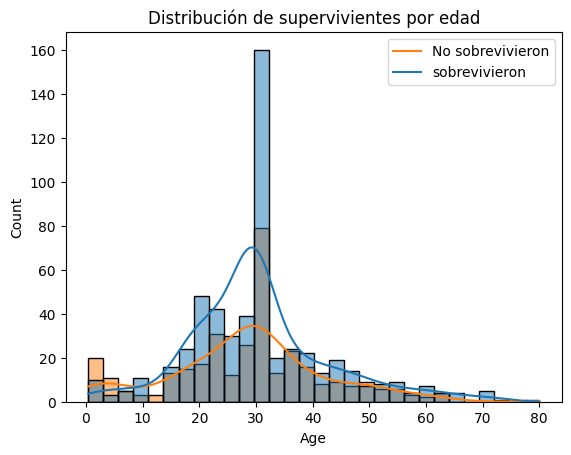

In [24]:
# Explorando la distribución por edad
sns.histplot(x='Age',hue='Survived',kde=True,data=df)
plt.title('Distribución de supervivientes por edad')
plt.legend(['No sobrevivieron','sobrevivieron'])
plt.show()

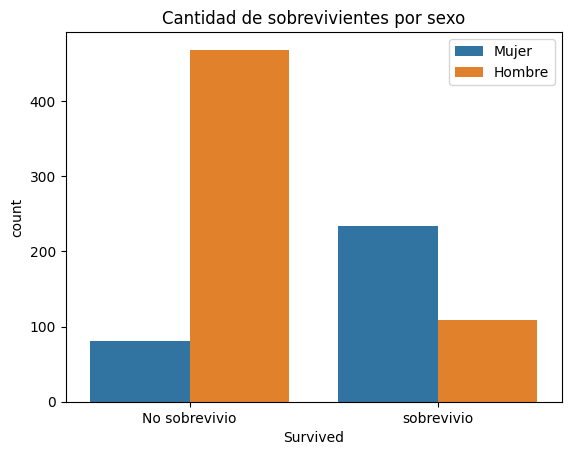

In [25]:
# Explorando la distribución de supervivencia por género
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title("Cantidad de sobrevivientes por sexo")
plt.legend(['Mujer','Hombre'])
plt.xticks((0,1),labels=['No sobrevivio','sobrevivio'])
plt.show()

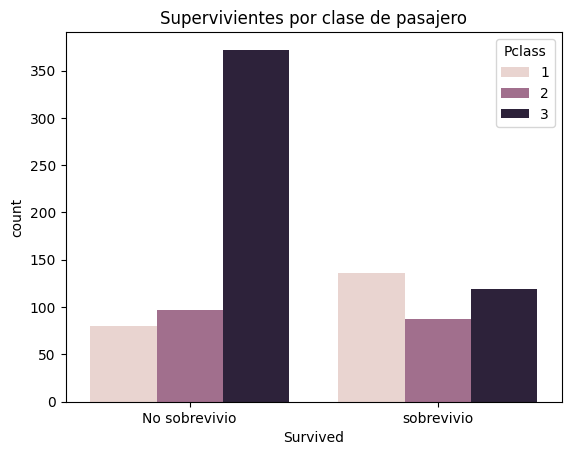

In [26]:
# Explorando la distribución de supervivientes por clase del pasajero
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title("Supervivientes por clase de pasajero")
plt.xticks((0,1),labels=['No sobrevivio','sobrevivio'])
plt.show()

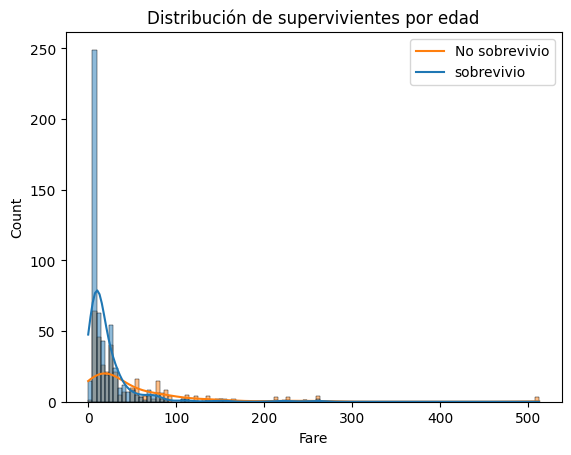

In [27]:
# Explorando el miedo entre los pasajeros
sns.histplot(x='Fare',hue='Survived',kde=True,data=df)
plt.title('Distribución de supervivientes por miedo')
plt.legend(['No sobrevivio','sobrevivio'])
plt.show()

In [29]:
# Separar los datos
X = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.fit_transform(X_test)


model = SVC()
model.fit(X_train_scalled,y_train)
y_pred = model.predict(X_test_scalled)
print(f"prediction :{y_pred}")

print('_______________________________________________________________________________')
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
confx_matrix = confusion_matrix(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precission: {precision}") 
print(f"Confussion Matrix :\n{confx_matrix}")

prediction :[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]
_______________________________________________________________________________
Accuracy: 0.8171641791044776
Precission: 0.8780487804878049
Confussion Matrix :
[[147  10]
 [ 39  72]]


In [31]:
prediction = pd.DataFrame(y_pred,columns=['Survived'])
prediction['Survived'] = prediction['Survived'].map({0:'No Sobrevivio',1:'Sobrevivio'})
prediction

,Survived
0,No Sobrevivio
1,No Sobrevivio
2,No Sobrevivio
3,Sobrevivio
4,Sobrevivio
...,...
263,No Sobrevivio
264,No Sobrevivio
265,No Sobrevivio
266,No Sobrevivio
